### Exploring the Data

In [1]:
# imports
import pandas as pd
import requests
import time
import datetime

In [2]:
# set display options 
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', None)

In [3]:
# read in combined csv file
df = pd.read_csv('./data/combined.csv')

In [4]:
df.shape

(55625, 29)

In [5]:
df.head()

,noticeId,title,solicitationNumber,department,subTier,office,postedDate,type,baseType,archiveType,archiveDate,typeOfSetAsideDescription,typeOfSetAside,responseDeadLine,naicsCode,classificationCode,active,award,pointOfContact,description,organizationType,officeAddress,placeOfPerformance,additionalInfoLink,uiLink,links,resourceLinks,cleaned_titles,date_posted
0,ffe3c07bab8b4a7d9be583fd4dd96c4a,REQUEST FOR INFORMATION - NEW DESIGN BOOKLET DIE CUTTING INSERT ASSEMBLY,RFI-042720,UNITED STATES GOVERNMENT PUBLISHING OFFICE,UNITED STATES GOVERNMENT PUBLISHING OFFICE,Acquisition Services,2020-04-27,Sources Sought,Sources Sought,auto15,2020-05-27,NaN,NaN,2020-05-12T14:00:00-04:00,333244.0,3610,Yes,NaN,"[{'fax': '', 'type': 'primary', 'email': 'rgraham@gpo.gov', 'phone': '2025120032', 'title': None, 'fullName': 'Rosalyn Graham'}, {'fax': '', 'type': 'secondary', 'email': 'rortega@gpo.gov', 'phone': '2025120803', 'title': None, 'fullName': 'Ronald Ortega'}]",https://api.sam.gov/prod/opportunities/v1/noticedesc?noticeid=ffe3c07bab8b4a7d9be583fd4dd96c4a,OFFICE,"{'zipcode': '20401', 'city': 'Washington', 'countryCode': 'USA', 'state': 'DC'}","{'state': {'code': 'DC', 'name': 'District of Columbia'}, 'zip': '20401', 'country': {'code': 'USA', 'name': 'UNITED STATES'}}",NaN,https://beta.sam.gov/opp/ffe3c07bab8b4a7d9be583fd4dd96c4a/view,"[{'rel': 'self', 'href': 'https://api.sam.gov/prod/opportunities/v1/search?noticeid=ffe3c07bab8b4a7d9be583fd4dd96c4a&limit=1', 'hreflang': None, 'media': None, 'title': None, 'type': None, 'deprecation': None}]","['https://beta.sam.gov/api/prod/opps/v3/opportunities/resources/files/bd2b3b5e86474278ae1ea1a163ccbfd7/download?api_key=null&token=', 'https://beta.sam.gov/api/prod/opps/v3/opportunities/resources/files/774a16e89e4d431e85b0eba1a510a24c/download?api_key=null&token=', 'https://beta.sam.gov/api/prod/opps/v3/opportunities/resources/files/b62d72d82537413f8537bb19160d49bd/download?api_key=null&token=']",Request For Information New Design Booklet Die Cutting Insert Assembly,2020-04-27
1,ff5e29951ed14b0386ea3291fa6c573f,Audiovisual Suite for Large Auditorium - Maxwell AFB,FA330020X0001,DEPT OF DEFENSE,DEPT OF THE AIR FORCE,FA3300 42 CONS CC,2020-04-27,Sources Sought,Sources Sought,auto15,2020-05-20,NaN,NaN,2020-05-05T12:00:00-05:00,334310.0,5836,Yes,NaN,"[{'fax': '3349532198', 'type': 'primary', 'email': 'brandon.osborne.6@us.af.mil', 'phone': '3349537835', 'title': None, 'fullName': 'Brandon Osborne'}, {'fax': '3349532198', 'type': 'secondary', 'email': 'jeremy.kersey.1@us.af.mil', 'phone': '3349533526', 'title': None, 'fullName': 'Jeremy B. Kersey'}]",https://api.sam.gov/prod/opportunities/v1/noticedesc?noticeid=ff5e29951ed14b0386ea3291fa6c573f,OFFICE,"{'zipcode': '36112-6334', 'city': 'MAXWELL AFB', 'countryCode': 'USA', 'state': 'AL'}","{'city': {'code': '51000', 'name': 'Montgomery'}, 'state': {'code': 'AL', 'name': 'Alabama'}, 'zip': '36112', 'country': {'code': 'USA', 'name': 'UNITED STATES'}}",NaN,https://beta.sam.gov/opp/ff5e29951ed14b0386ea3291fa6c573f/view,"[{'rel': 'self', 'href': 'https://api.sam.gov/prod/opportunities/v1/search?noticeid=ff5e29951ed14b0386ea3291fa6c573f&limit=1', 'hreflang': None, 'media': None, 'title': None, 'type': None, 'deprecation': None}]",['https://beta.sam.gov/api/prod/opps/v3/opportunities/resources/files/c2a6338838ed4ebfa7d70e91221ffc21/download?api_key=null&token='],Audiovisual Suite For Large Auditorium Maxwell Afb,2020-04-27
2,ff2a16aad70246d1ba10e639c11456d4,Metrology Equipment Move,SP4703-20-Q-0045,DEPT OF DEFENSE,DEFENSE LOGISTICS AGENCY (DLA),DCSO RICHMOND,2020-04-27,Combined Synopsis/Solicitation,Combined Synopsis/Solicitation,auto15,2020-05-19,Total Small Business Set-Aside (FAR 19.5),SBA,2020-05-04T15:00:00-04:00,238990.0,Z1PZ,Yes,NaN,"[{'fax': '', 'type': 'primary', 'email': 'Kiara.leslie@dla.mil', 'phone': '8042796566', 'title': None, 'fullName': 'Kiara Leslie'}, {'fax': '', 'type': 'secondary', 'email': 'mary.washington@dla.mil', 'phone': '8042795628', 'tit

In [6]:
df.tail()

,noticeId,title,solicitationNumber,department,subTier,office,postedDate,type,baseType,archiveType,archiveDate,typeOfSetAsideDescription,typeOfSetAside,responseDeadLine,naicsCode,classificationCode,active,award,pointOfContact,description,organizationType,officeAddress,placeOfPerformance,additionalInfoLink,uiLink,links,resourceLinks,cleaned_titles,date_posted
55620,006816da72d442aeac1bc7efe0afe201,Preventative Maintenance Emergency Repair of Eaton Uninterruptible Power Supply System,FA481420P0042,DEPT OF DEFENSE,DEPT OF THE AIR FORCE,FA4814 6 CONS PK,2020-06-03,Justification,Justification,auto30,2020-07-03,NaN,NaN,NaN,811219.0,J061,Yes,"{'date': '2020-05-22', 'number': 'FA481420P0042'}","[{'fax': '', 'type': 'primary', 'email': 'tricia.keene@us.af.mil', 'phone': '8138280485', 'title': None, 'fullName': 'Tricia Keene'}]",https://api.sam.gov/prod/opportunities/v1/noticedesc?noticeid=006816da72d442aeac1bc7efe0afe201,OFFICE,"{'zipcode': '33621-5119', 'city': 'TAMPA', 'countryCode': 'USA', 'state': 'FL'}","{'city': {'code': '71000', 'name': 'Tampa'}, 'state': {'code': 'FL', 'name': 'Florida'}, 'zip': '33621', 'country': {'code': 'USA', 'name': 'UNITED STATES'}}",NaN,https://beta.sam.gov/opp/006816da72d442aeac1bc7efe0afe201/view,"[{'rel': 'self', 'href': 'https://api.sam.gov/prod/opportunities/v1/search?noticeid=006816da72d442aeac1bc7efe0afe201&limit=1'}]",['https://beta.sam.gov/api/prod/opps/v3/opportunities/resources/files/ce64a7a886014b0996bea5ca8bec53dc/download?api_key=null&token='],Preventative Maintenance Emergency Repair Of Eaton Uninterruptible Power Supply System,2020-06-03
55621,00624941e33545db91e5d132a10f7c8c,"61--BATTERY,STORAGE",SPE7L720T4198,DEPT OF DEFENSE,DEFENSE LOGISTICS AGENCY (DLA),DLA LAND AND MARITIME,2020-06-03,Combined Synopsis/Solicitation,Combined Synopsis/Solicitation,autocustom,2020-07-15,Historically Underutilized Business (HUBZone) Set-Aside (FAR 19.13),HZC,2020-06-15,335999.0,61,Yes,{'awardee': {'location': {}}},"[{'fax': None, 'type': 'primary', 'email': 'DibbsBSM@dla.mil', 'phone': None, 'title': None, 'fullName': 'Questions regarding this solicitation should be emailed to the buyer listed in block 5 of the solicitation document which can be found under the Additional Information link.\nIf the Additional Information link does not work, please go to https://www.dibbs.'}]",https://api.sam.gov/prod/opportunities/v1/noticedesc?noticeid=00624941e33545db91e5d132a10f7c8c,OFFICE,"{'zipcode': '43218-3990', 'city': 'COLUMBUS', 'countryCode': 'USA', 'state': 'OH'}",{},NaN,https://beta.sam.gov/opp/00624941e33545db91e5d132a10f7c8c/view,"[{'rel': 'self', 'href': 'https://api.sam.gov/prod/opportunities/v1/search?noticeid=00624941e33545db91e5d132a10f7c8c&limit=1'}]",NaN,Battery Storage,2020-06-03
55622,0053c3932ac049aca98baac97e9e4b7c,"66--INDICATOR,COURSE",SPE4A620T23L8,DEPT OF DEFENSE,DEFENSE LOGISTICS AGENCY (DLA),DLA AVIATION,2020-06-03,Combined Synopsis/Solicitation,Combined Synopsis/Solicitation,autocustom,2020-07-11,Service-Disabled Veteran-Owned Small Business (SDVOSB) Set-Aside (FAR 19.14),SDVOSBC,2020-06-11,334511.0,66,Yes,{'awardee': {'location': {}}},"[{'fax': None, 'type': 'primary', 'email': 'DibbsBSM@dla.mil', 'phone': None, 'title': None, 'fullName': 'Questions regarding this solicitation should be emailed to the buyer listed in block 5 of the solicitation document which can be found under the Additional Information link.\nIf the Additional Information link does not work, please go to https://www.dibbs.'}]",https://api.sam.gov/prod/opportunities/v1/noticedesc?noticeid=0053c3932ac049aca98baac97e9e4b7c,OFFICE,"{'zipcode': '23297', 'city': 'RICHMOND', 'countryCode': 'USA', 'state': 'VA'}",{},NaN,https://beta.sam.gov/opp/0053c3932ac049aca98baac97e9e4b7c/view,"[{'rel': 'self', 'href': 'https://api.sam.gov/prod/opportunities/v1/search?noticeid=0053c3932ac049aca98baac97e9e4b7c&limit=1'}]",NaN,Indicator Course,2020-06-03
55623,00159f16f3c94b84af124e5ceacbd914,"70--READER,MAGNETIC-CON",SPE8EN20T3243,DEPT OF D

In [7]:
# find and drop duplicates
print('Number of duplicated rows:', df.loc[df.duplicated()].shape[0])

Number of duplicated rows: 4703


In [8]:
# drop duplicates
df = df.drop_duplicates()

In [9]:
# check number of rows after removing duplicates

print('Number of rows after removing duplicates:', df.shape[0])

Number of rows after removing duplicates: 50922


In [10]:
# export dataframe into csv file

df.to_csv('./data/combined.csv', index=False)

## EDA

In [11]:
# inspect data
# inspect data

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50922 entries, 0 to 55599
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   noticeId                   50922 non-null  object 
 1   title                      50922 non-null  object 
 2   solicitationNumber         50530 non-null  object 
 3   department                 50883 non-null  object 
 4   subTier                    50807 non-null  object 
 5   office                     50881 non-null  object 
 6   postedDate                 50922 non-null  object 
 7   type                       50922 non-null  object 
 8   baseType                   50922 non-null  object 
 9   archiveType                50922 non-null  object 
 10  archiveDate                50922 non-null  object 
 11  typeOfSetAsideDescription  18501 non-null  object 
 12  typeOfSetAside             18501 non-null  object 
 13  responseDeadLine           41722 non-null  obj

#### Missing Data

In [12]:
import matplotlib.pyplot as plt

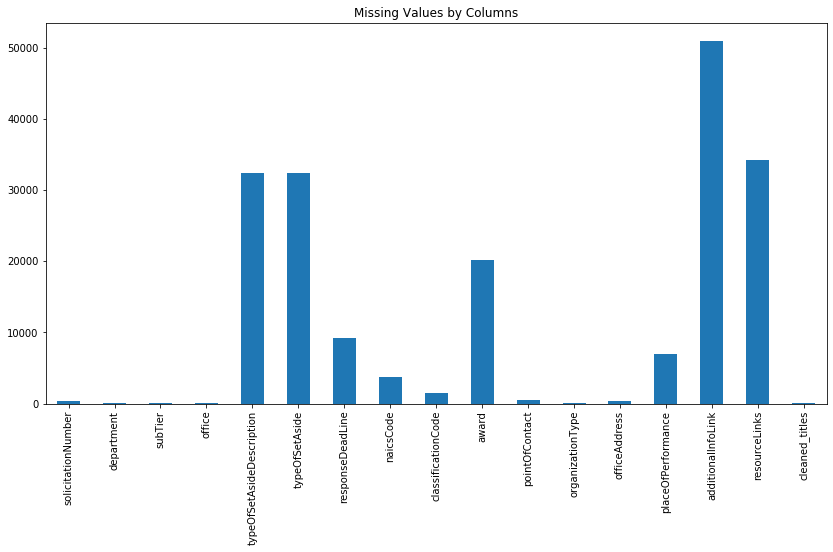

In [13]:
# create a plot that shows columns with missing values

# columns with missing values
cols_w_missings = df.loc[:, df.isna().sum() > 0]

# plot missing data
# set figsize
plt.figure(figsize=(14, 7))
# set title
plt.title('Missing Values by Columns')   
# plot the number of missing values in each column
cols_w_missings.isna().sum().plot(kind='bar');

In [14]:
# prints
print(f'Number of observations: {df.shape[0]}')
print('')
print('Number of missing values:')
for i in range(len(cols_w_missings.columns)):
    print(f'    {cols_w_missings.columns[i]} column\
    = {cols_w_missings[cols_w_missings.columns[i]].isna().sum()}')

Number of observations: 50922

Number of missing values:
    solicitationNumber column    = 392
    department column    = 39
    subTier column    = 115
    office column    = 41
    typeOfSetAsideDescription column    = 32421
    typeOfSetAside column    = 32421
    responseDeadLine column    = 9200
    naicsCode column    = 3667
    classificationCode column    = 1496
    award column    = 20168
    pointOfContact column    = 445
    organizationType column    = 39
    officeAddress column    = 345
    placeOfPerformance column    = 6921
    additionalInfoLink column    = 50922
    resourceLinks column    = 34208
    cleaned_titles column    = 19


In [15]:
# additionalInfoLink column has no values
# drop additionalInfoLink column
df.drop('additionalInfoLink', axis=1, inplace=True)

**Explore the Type of Award Notices**

In [16]:
# find count unique values of df['type']
df['type'].value_counts(normalize=True)

Combined Synopsis/Solicitation    0.402793
Solicitation                      0.160304
Presolicitation                   0.144574
Award Notice                      0.127195
Sources Sought                    0.084305
Special Notice                    0.057794
Justification                     0.022230
Sale of Surplus Property          0.000786
Intent to Bundle Requirements     0.000020
Name: type, dtype: float64

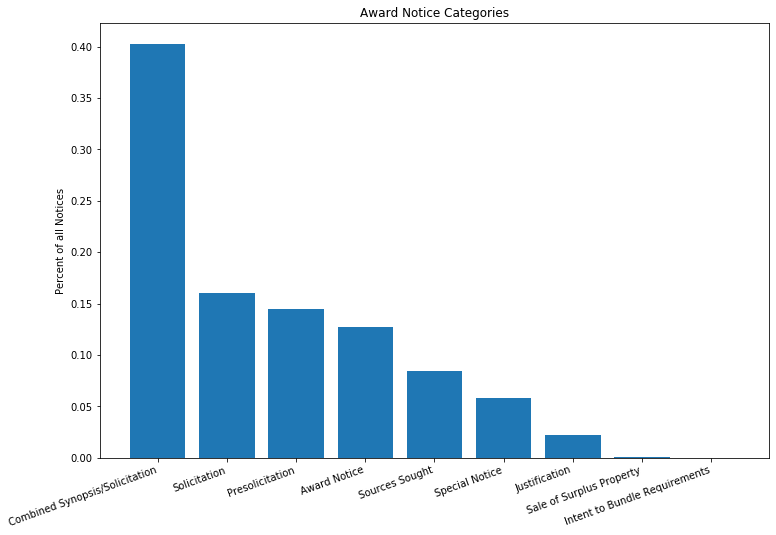

In [18]:
# find count unique values of df['type']

fig = plt.figure(figsize=(12, 8))
plt.title('Award Notice Categories')
plt.xticks(rotation=20, ha='right')
plt.ylabel('Percent of all Notices')
plt.bar(df['type'].value_counts().index, df['type'].value_counts(normalize=True));

# save figure
plt.savefig('./images/notice_categories.png', dpi=300, bbox_inches='tight')

# xticks rotation source: https://kite.com/python/answers/how-to-rotate-date-ticks-using-matplotlib-in-python
# xticks alignment source: https://stackoverflow.com/questions/14852821/aligning-rotated-xticklabels-with-their-respective-xticks

In [32]:
# create a column for combined notification types
df['combined_type'] = df['type'].map({'Combined Synopsis/Solicitation': 'Solicitation',
                                      'Solicitation': 'Solicitation',
                                      'Presolicitation': 'Presolicitation',
                                      'Award Notice': 'Award Notice',
                                      'Sources Sought': 'Presolicitation',
                                      'Special Notice': 'Other',
                                      'Justification': 'Other',
                                      'Sale of Surplus Property': 'Other',
                                      'Intent to Bundle Requirements': 'Other'})

In [33]:
df['combined_type'].value_counts(normalize=True)

Solicitation       0.563097
Presolicitation    0.228879
Award Notice       0.127195
Other              0.080830
Name: combined_type, dtype: float64

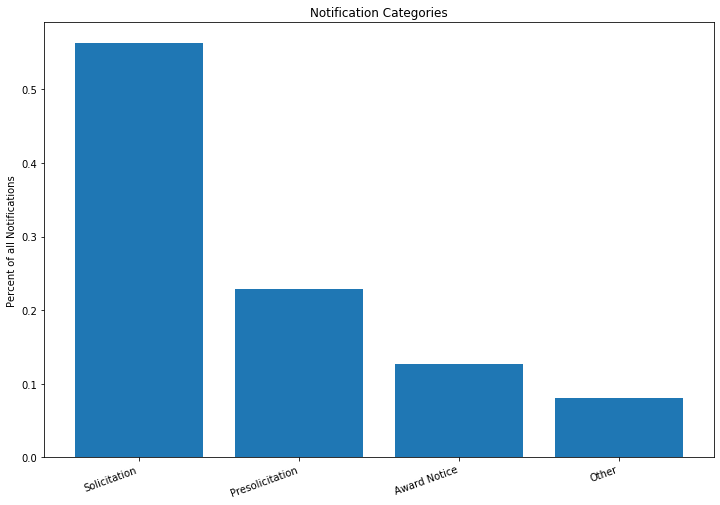

In [34]:
# find count unique values of df['combined_type']

fig = plt.figure(figsize=(12, 8))
plt.title('Notification Categories')
plt.xticks(rotation=20, ha='right')
plt.ylabel('Percent of all Notifications')
plt.bar(df['combined_type'].value_counts().index, df['combined_type'].value_counts(normalize=True));

# save figure
plt.savefig('./images/notice_categories_combined.png', dpi=300, bbox_inches='tight')

# xticks rotation source: https://kite.com/python/answers/how-to-rotate-date-ticks-using-matplotlib-in-python
# xticks alignment source: https://stackoverflow.com/questions/14852821/aligning-rotated-xticklabels-with-their-respective-xticks

In [51]:
# combine solicitation notices with combined synopsis and soliciation notices
# this gives back the percent of notices that solicit applications for award

print(f"Percent of all soliciation notices: \
{round(df['type'].value_counts(normalize=True)['Combined Synopsis/Solicitation'] + df['type'].value_counts(normalize=True)['Solicitation'], 4)}\
")

Percent of all soliciation notices: 0.5621


*Observation:* combined synopsis and solicitation is about 56% of all Notices. When we combine all types of solicitations, 58.7% of all notices is soliciting for a submission. 

*Note:* Special Notice may contain combined sysnopsis and soliciation, and presolicitation may be sources sought. 

**Eplore Notices by Departments**

In [19]:
df['department'].value_counts(normalize=True)

DEPT OF DEFENSE                                                          0.741643
VETERANS AFFAIRS, DEPARTMENT OF                                          0.077236
INTERIOR, DEPARTMENT OF THE                                              0.033096
HOMELAND SECURITY, DEPARTMENT OF                                         0.023367
AGRICULTURE, DEPARTMENT OF                                               0.022424
                                                                           ...   
FEDERAL DEPOSIT INSURANCE CORPORATION                                    0.000039
COMMITTEE FOR PURCHASE FROM PEOPLE WHO ARE BLIND OR SEVERELY DISABLED    0.000039
FEDERAL RETIREMENT THRIFT INVESTMENT BOARD                               0.000020
FEDERAL HOUSING FINANCE AGENCY                                           0.000020
RAILROAD RETIREMENT BOARD                                                0.000020
Name: department, Length: 62, dtype: float64

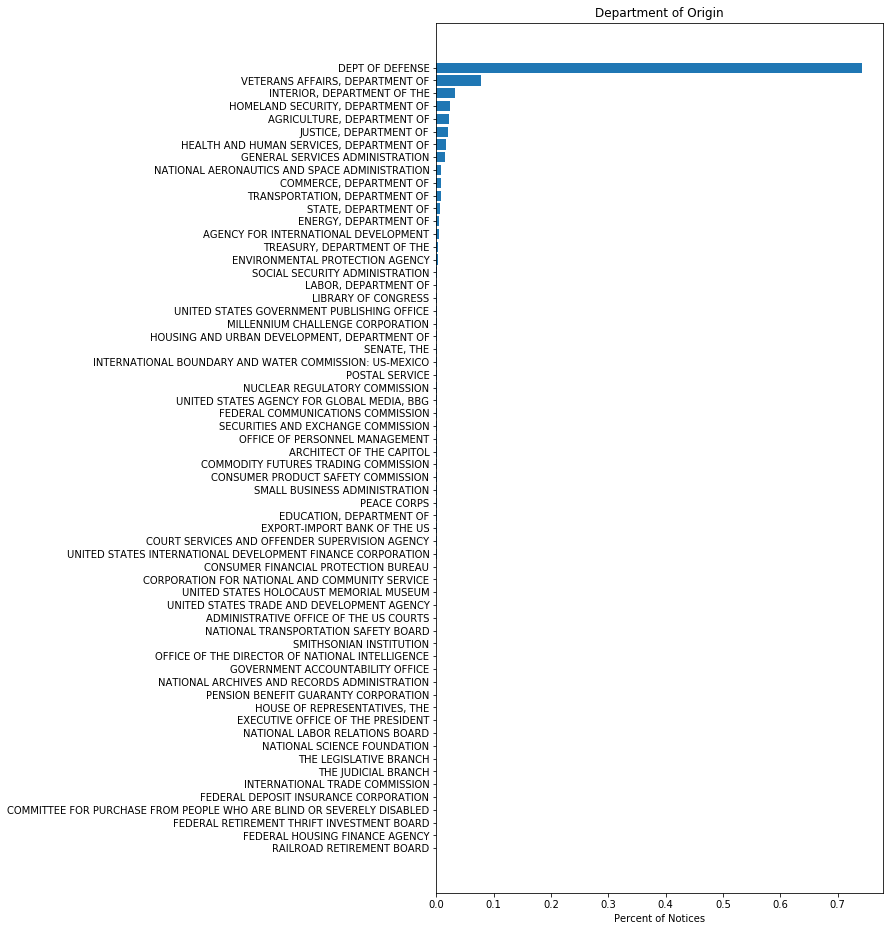

In [20]:
# majority of the notices originated from the Department of Defense
# plot
fig = plt.figure(figsize=(8, 16))
plt.title('Department of Origin')
plt.xlabel('Percent of Notices')
plt.barh(df['department'].value_counts().sort_values().index, 
         df['department'].value_counts(normalize=True).sort_values());


The Department of Defense has far the most award notices. Let's look at what subtiers are active in award solicitation.

In [21]:
# isolate the Department of Defense notices - and break it down by subtiers
df.loc[df['department'] == 'DEPT OF DEFENSE']['subTier'].value_counts(normalize=True)

DEFENSE LOGISTICS AGENCY (DLA)                                   0.527192
DEPT OF THE NAVY                                                 0.189282
DEPT OF THE ARMY                                                 0.171870
DEPT OF THE AIR FORCE                                            0.066893
DEFENSE INFORMATION SYSTEMS AGENCY (DISA)                        0.029869
US SPECIAL OPERATIONS COMMAND (USSOCOM)                          0.001829
DEFENSE COMMISSARY AGENCY  (DECA)                                0.001802
DEPT OF DEFENSE EDUCATION ACTIVITY (DODEA)                       0.001617
DEFENSE ADVANCED RESEARCH PROJECTS AGENCY  (DARPA)               0.001617
WASHINGTON HEADQUARTERS SERVICES (WHS)                           0.001405
US TRANSPORTATION COMMAND (USTRANSCOM)                           0.001193
NATIONAL GEOSPATIAL-INTELLIGENCE AGENCY (NGA)                    0.000928
DEFENSE HEALTH AGENCY (DHA)                                      0.000875
MISSILE DEFENSE AGENCY (MDA)          

In [22]:
# what type of notices are the most common for the Department of Defense
print('What are the most common types of contract notices coming from the Department of Defense?')
df.loc[df['department'] == 'DEPT OF DEFENSE']['type'].value_counts(normalize=True)

What are the most common types of contract notices coming from the Department of Defense?


Combined Synopsis/Solicitation    0.457032
Solicitation                      0.150091
Presolicitation                   0.136921
Award Notice                      0.130429
Sources Sought                    0.065029
Special Notice                    0.040279
Justification                     0.019132
Sale of Surplus Property          0.001060
Intent to Bundle Requirements     0.000026
Name: type, dtype: float64

In [23]:
# find all the combined synopsis/ solicitation notices and the solicitation notices
# output the departments that are soliciting for submission
print('Which department has most often published contract solicitations between March 1 and May 22?')
df.loc[(df['type'] == 'Combined Synopsis/Solicitation') | (df['type'] == 'Solicitation')]['department']\
.value_counts(normalize=True)

Which department has most often published contract solicitations between March 1 and May 22?


DEPT OF DEFENSE                                                0.799156
VETERANS AFFAIRS, DEPARTMENT OF                                0.042624
INTERIOR, DEPARTMENT OF THE                                    0.033067
HOMELAND SECURITY, DEPARTMENT OF                               0.025044
AGRICULTURE, DEPARTMENT OF                                     0.021801
JUSTICE, DEPARTMENT OF                                         0.018801
HEALTH AND HUMAN SERVICES, DEPARTMENT OF                       0.013011
STATE, DEPARTMENT OF                                           0.006139
GENERAL SERVICES ADMINISTRATION                                0.005895
TRANSPORTATION, DEPARTMENT OF                                  0.005581
COMMERCE, DEPARTMENT OF                                        0.005162
AGENCY FOR INTERNATIONAL DEVELOPMENT                           0.004848
ENERGY, DEPARTMENT OF                                          0.003802
NATIONAL AERONAUTICS AND SPACE ADMINISTRATION                  0

In [24]:
# # find all the combined synopsis/ solicitation notices and the solicitation notices
# output the subtiers within departments that are soliciting for submission
print('Which subtier has most often published contract solicitations between March 1 and May 22?')
df.loc[(df['type'] == 'Combined Synopsis/Solicitation') | (df['type'] == 'Solicitation')]['subTier']\
.value_counts(normalize=True)

Which subtier has most often published contract solicitations between March 1 and May 22?


DEFENSE LOGISTICS AGENCY (DLA)                                   0.489832
DEPT OF THE ARMY                                                 0.120862
DEPT OF THE NAVY                                                 0.119537
VETERANS AFFAIRS, DEPARTMENT OF                                  0.042624
DEPT OF THE AIR FORCE                                            0.037288
                                                                   ...   
SAINT LAWRENCE SEAWAY DEVELOPMENT CORPORATION                    0.000035
UNIFORMED SERVICES UNIVERSITY OF THE HEALTH SCIENCES  (USUHS)    0.000035
NATIONAL TELECOMMUNICATIONS AND INFORMATION ADMINISTRATION       0.000035
FEDERAL TRANSIT ADMINISTRATION                                   0.000035
NATIONAL SCIENCE FOUNDATION                                      0.000035
Name: subTier, Length: 134, dtype: float64

In [25]:
# find all award notices
# output frequency by deparments
print('Which department published the most award notice during this year?')
df.loc[df['type'] == 'Award Notice']['department'].value_counts(normalize=True)

Which department published the most award notice during this year?


DEPT OF DEFENSE                                  0.763101
VETERANS AFFAIRS, DEPARTMENT OF                  0.068992
INTERIOR, DEPARTMENT OF THE                      0.033023
JUSTICE, DEPARTMENT OF                           0.029922
GENERAL SERVICES ADMINISTRATION                  0.028062
AGRICULTURE, DEPARTMENT OF                       0.024031
HOMELAND SECURITY, DEPARTMENT OF                 0.024031
HEALTH AND HUMAN SERVICES, DEPARTMENT OF         0.009922
COMMERCE, DEPARTMENT OF                          0.004651
STATE, DEPARTMENT OF                             0.003876
NATIONAL AERONAUTICS AND SPACE ADMINISTRATION    0.002171
TRANSPORTATION, DEPARTMENT OF                    0.001550
ENVIRONMENTAL PROTECTION AGENCY                  0.001550
ENERGY, DEPARTMENT OF                            0.001240
LIBRARY OF CONGRESS                              0.000775
UNITED STATES GOVERNMENT PUBLISHING OFFICE       0.000620
AGENCY FOR INTERNATIONAL DEVELOPMENT             0.000620
LABOR, DEPARTM

In [27]:
# find all Sources Sought notices
# output frequency by deparments
print('Which department published the most "solicitation for interest" during this year?')
df.loc[df['type'] == 'Sources Sought']['department'].value_counts(normalize=True)

Which department published the most "solicitation for interest" during this year?


DEPT OF DEFENSE                                   0.572295
VETERANS AFFAIRS, DEPARTMENT OF                   0.205224
HEALTH AND HUMAN SERVICES, DEPARTMENT OF          0.035681
GENERAL SERVICES ADMINISTRATION                   0.033582
INTERIOR, DEPARTMENT OF THE                       0.029851
HOMELAND SECURITY, DEPARTMENT OF                  0.023321
AGRICULTURE, DEPARTMENT OF                        0.014692
TRANSPORTATION, DEPARTMENT OF                     0.014226
COMMERCE, DEPARTMENT OF                           0.013526
JUSTICE, DEPARTMENT OF                            0.010728
NATIONAL AERONAUTICS AND SPACE ADMINISTRATION     0.010261
ENERGY, DEPARTMENT OF                             0.008629
STATE, DEPARTMENT OF                              0.005830
TREASURY, DEPARTMENT OF THE                       0.005131
LABOR, DEPARTMENT OF                              0.003265
AGENCY FOR INTERNATIONAL DEVELOPMENT              0.003032
SENATE, THE                                       0.0027